In [1]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn import model_selection
import re,string
import operator
import matplotlib.pyplot as plt

In [2]:
#taking the documents in X and Classes in Y
X  =[] 
Y = []
for category in os.listdir("D:/newspaper"):
    for document in os.listdir("D:/newspaper/"+category):
        for random in os.listdir("D:/newspaper/"+category+'/'+document):
            with open("D:/newspaper/"+category+'/'+document+'/'+random,"r") as f:
                X.append((random,f.read()))
                Y.append(document)

In [3]:
len(X)

19997

In [5]:
#stop-words taken from the internet
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [6]:
#splitting into training and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [7]:
len(x_train)

14997

In [8]:
#making the dictionary for the features
d={}
for i in range(len(x_train)):
    text=x_train[i][1].lower()
    words=re.split(r'\W+',text)
    for w in words:
        #ignoring the words which are in 'stop-word' and ignoring other insignificant words
        if not(w.isalpha()) or w in stop_word or len(w)<=2:
            continue
        if w in d:
            d[w]+=1
        else:
            d[w]=1
d

{'newsgroups': 15298,
 'comp': 9872,
 'sys': 3106,
 'ibm': 3264,
 'hardware': 2648,
 'path': 15271,
 'cantaloupe': 19515,
 'srv': 24230,
 'cmu': 39253,
 'edu': 122899,
 'rochester': 3625,
 'udel': 3228,
 'bogus': 1063,
 'sura': 2795,
 'net': 19142,
 'news': 25746,
 'feed': 837,
 'peachnet': 685,
 'gatech': 3281,
 'swrinde': 657,
 'sdd': 1031,
 'com': 37781,
 'pcd': 38,
 'hpcvca': 13,
 'hpcvccl': 16,
 'scott': 667,
 'linn': 9,
 'subject': 16223,
 'amd': 68,
 'clones': 27,
 'now': 4358,
 'legal': 966,
 'message': 16430,
 'sender': 8284,
 'nobody': 384,
 'nntp': 7036,
 'posting': 7372,
 'host': 6708,
 'organization': 14891,
 'hewlett': 200,
 'packard': 212,
 'company': 799,
 'corvallis': 26,
 'oregon': 150,
 'usa': 2633,
 'references': 9741,
 'wyman': 7,
 'distribution': 3564,
 'date': 15584,
 'wed': 1190,
 'apr': 15435,
 'gmt': 13313,
 'lines': 15684,
 'rtsg': 194,
 'mot': 724,
 'mark': 1397,
 'writes': 10952,
 'poe': 28,
 'wharton': 29,
 'upenn': 635,
 'friend': 561,
 'mine': 661,
 'cal

In [9]:
#sorting the dictionary
sd = sorted(d.items(), key=lambda x: x[1],reverse=True)
sd

[('edu', 122899),
 ('cmu', 39253),
 ('com', 37781),
 ('news', 25746),
 ('not', 25328),
 ('srv', 24230),
 ('cantaloupe', 19515),
 ('net', 19142),
 ('message', 16430),
 ('subject', 16223),
 ('lines', 15684),
 ('date', 15584),
 ('apr', 15435),
 ('newsgroups', 15298),
 ('path', 15271),
 ('organization', 14891),
 ('can', 14871),
 ('state', 14190),
 ('gmt', 13313),
 ('ohio', 11907),
 ('one', 11750),
 ('will', 11467),
 ('writes', 10952),
 ('article', 10043),
 ('comp', 9872),
 ('references', 9741),
 ('talk', 9262),
 ('misc', 9005),
 ('ans', 8314),
 ('sender', 8284),
 ('howland', 8240),
 ('reston', 8216),
 ('don', 8030),
 ('people', 7881),
 ('like', 7828),
 ('just', 7505),
 ('university', 7454),
 ('posting', 7372),
 ('nntp', 7036),
 ('mps', 6919),
 ('know', 6875),
 ('host', 6708),
 ('sci', 6438),
 ('get', 6431),
 ('usenet', 6338),
 ('think', 6267),
 ('zaphod', 6226),
 ('may', 6066),
 ('alt', 5963),
 ('politics', 5923),
 ('windows', 5784),
 ('also', 5566),
 ('rutgers', 5322),
 ('time', 5311),
 (

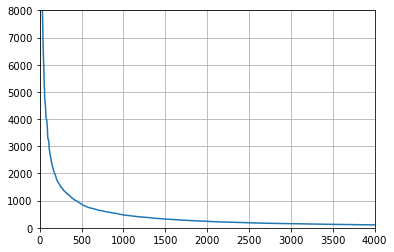

In [10]:
#plotting the dictionary to select number of features
axis1=[]
axis2=[]

for i in range(len(sd)):
    axis1.append(i)
    axis2.append(sd[i][1])
plt.axis([0,4000,0,8000])
plt.plot(axis1,axis2)
plt.grid()
plt.show()

In [11]:
#2000 seems like a good choice for number of features
features=[]
for i in range(2000):
    features.append(sd[i][0])
features

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'usenet',
 'think',
 'zaphod',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'rutgers',
 'time',
 'harvard',
 'eng',
 'near',
 'use',
 'new',
 'rec',
 'good',
 'system',
 'sei',
 'crabapple',
 'well',
 'noc',
 'das',
 'xref',
 'soc',
 'even',
 'now',
 'cis',
 'god',
 'see',
 'max',
 'way',
 'europa',
 'religion',
 'world',
 'gtefsd',
 'ece',
 'org',
 'uunet',
 'say',
 'make',
 'christian',
 'two',
 'much',
 'many',
 'gov',
 'first',
 'right',
 'rochester',
 'distribution',
 'club',
 'mail',
 'magnesium',
 'andrew',
 'said',
 'gatech',
 'want',
 'anyo

In [12]:
#creating a dataset for training
x_train_dataset=np.zeros([len(x_train),len(features)],int)
for i in range(len(x_train)):
    text=x_train[i][1].lower()
    words=re.split(r'\W+',text)
    for w in words:
        if w in features:
            x_train_dataset[i][features.index(w)]+=1

In [13]:
#creating a dataset for testing
x_test_dataset=np.zeros([len(x_test),len(features)],int)
for i in range(len(x_test)):
    text=x_test[i][1].lower()
    words=re.split(r'\W+',text)
    for w in words:
        if w in features:
            x_test_dataset[i][features.index(w)]+=1

In [14]:
x_train_dataset

array([[ 3,  1,  8, ...,  0,  0,  0],
       [ 9,  3,  1, ...,  0,  0,  0],
       [15,  4,  1, ...,  0,  0,  0],
       ...,
       [11,  3,  1, ...,  0,  0,  0],
       [ 5,  3,  0, ...,  0,  0,  0],
       [10,  3,  1, ...,  0,  0,  0]])

In [15]:
x_test_dataset

array([[14,  4,  1, ...,  0,  0,  0],
       [21,  5,  7, ...,  0,  0,  0],
       [ 6,  4,  5, ...,  0,  0,  0],
       ...,
       [11,  3,  5, ...,  0,  0,  0],
       [11,  3,  2, ...,  0,  0,  0],
       [ 3,  1, 10, ...,  0,  0,  0]])

## SKLEARN IMPLEMENTATION ##

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
NB=MultinomialNB()
NB.fit(x_train_dataset,y_train)
y_pred_sk=NB.predict(x_test_dataset)
print(NB.score(x_train_dataset,y_train))
print(NB.score(x_test_dataset,y_test))

0.8955791158231646
0.856


## SELF IMPLEMENTATION ##

In [18]:
# fit function
def fit(xt,yt):
    yt=np.array(yt)
    #print(type(xt))
    (m,n)=xt.shape
    result = {}
    result['m']=m
    result['n']=n
    for a in set(yt):
        xtemp = xt[yt==a]
        result[a]={}
        result[a]['total_words']=xtemp.sum()
        result[a]['length_class']=len(xtemp)
        for f in features:
            i= features.index(f)
            result[a][f]=xtemp[:,i].sum()
    return result

In [54]:
# predict function
def predict(xt,result):
    yt=[]
    for x in xt:
        y=predict_single_point(x,result)
        yt.append(y)
    return yt

In [39]:
# predicting outcome for a single x
def predict_single_point(x,result):
    first_run=True
    max_prob=-10000
    best_class=-1
    classes = result.keys()
    for a in classes:
        if a=='m' or a=='n':
            continue
        pr=probability(x,a,result)
        if first_run or pr>max_prob:
            max_prob=pr
            best_class=a
            first_run=False
    return best_class

In [28]:
# calculating probabilities with Laplace correction
def probability(x,a,result):
    ans=np.log(result[a]['length_class'])-np.log(result['m'])
    for w in features:
        i=features.index(w)
        xt=x[i]
        if xt==0:
            pr=0
        else:
            num=1+result[a][w]
            den=result['n']+result[a]['total_words']
            pr=np.log(num) - np.log(den)
        ans+=pr
    return ans

In [22]:
# defining a function for calculating accuracy
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
result=fit(x_train_dataset,y_train)

In [24]:
# dictionary made by fitting the training data
result

{'m': 14997,
 'n': 2000,
 'comp.windows.x': {'total_words': 101592,
  'length_class': 736,
  'edu': 4751,
  'cmu': 1826,
  'com': 1858,
  'news': 1264,
  'not': 868,
  'srv': 1140,
  'cantaloupe': 948,
  'net': 1015,
  'message': 861,
  'subject': 946,
  'lines': 825,
  'date': 801,
  'apr': 634,
  'newsgroups': 761,
  'path': 797,
  'organization': 746,
  'can': 919,
  'state': 523,
  'gmt': 647,
  'ohio': 473,
  'one': 353,
  'will': 503,
  'writes': 263,
  'article': 248,
  'comp': 1813,
  'references': 302,
  'talk': 13,
  'misc': 114,
  'ans': 431,
  'sender': 447,
  'howland': 429,
  'reston': 431,
  'don': 193,
  'people': 85,
  'like': 325,
  'just': 241,
  'university': 253,
  'posting': 396,
  'nntp': 379,
  'mps': 297,
  'know': 236,
  'host': 452,
  'sci': 12,
  'get': 437,
  'usenet': 254,
  'think': 117,
  'zaphod': 269,
  'may': 389,
  'alt': 38,
  'politics': 0,
  'windows': 1884,
  'also': 316,
  'rutgers': 27,
  'time': 233,
  'harvard': 264,
  'eng': 190,
  'near': 2

In [55]:
#predictions using own implemented multinomial naive bayes
y_pred_mine=predict(x_test_dataset,result)

In [56]:
print(score(y_pred_mine,y_test))

0.8726


## Performance of sk learn algorithm

In [61]:
print(confusion_matrix(y_test,y_pred_sk))
print(classification_report(y_test,y_pred_sk))
print(NB.score(x_test_dataset,y_test))

[[214   2   0   0   0   0   0   1   0   0   0   0   1   0   1   1   0   1
    0  42]
 [  0 200  10  11   5   4   6   1   0   0   0   2   4   3   2   0   0   0
    0   0]
 [  0   3 179  19   4  19   6   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  1   6   4 197  35   2   4   1   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   2  16 234   0   3   0   0   0   0   0   3   0   1   0   0   0
    0   0]
 [  0  25  15   4   3 207   6   0   0   0   0   0   1   2   1   0   0   0
    0   0]
 [  0   1   0   8   3   0 225   8   3   0   1   0   2   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   8 226   9   1   0   0   4   0   1   0   0   0
    1   0]
 [  0   0   0   0   0   1   2   6 240   1   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   4   5 214  15   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   0  12 232   0   0   0   0   0   0   0
    1   0]
 [  0   2   1   0   0   1   1   1   0   0   0 244   7   1   0   0

## Performance of my algorithm

In [62]:
print(confusion_matrix(y_test,y_pred_mine))
print(classification_report(y_test,y_pred_mine))
print(score(y_test,y_pred_mine))

[[233   1   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    1  26]
 [  0 218   3  12   3   3   2   0   0   0   0   3   2   2   0   0   0   0
    0   0]
 [  0   8 154  30   3  30   4   0   0   0   0   1   0   0   0   0   0   0
    1   0]
 [  0  10   2 204  34   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   1  17 234   0   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  28   8   2   1 218   3   0   1   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   0   1   7   6   0 225   5   1   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   9 228   5   0   0   0   6   1   0   0   0   0
    1   0]
 [  1   1   0   0   0   0   2   2 244   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   0 229  11   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   6 239   0   0   0   0   0   0   0
    1   0]
 [  0   5   0   0   0   2   0   0   0   0   0 247   5   0   0   0

Performance of both the algorithms are pretty similar on the given testing dataset.
Both the algorithms struggled with 'talk.religion.misc' & 'talk.politics.misc' classes but did reasonably good for other classes. Overall both the algorithms were pretty successfull working on this particular dataset 

## Comparision (testing data)

My algorithm gave an accuracy of 0.8726 whereas the sk learn algorithm gave an accuracy of 0.856. My algorithm gave an average f1 score of 0.87 whereas sk learn algorithm gave an average f1 score of 0.86